## Data analyser

In [1]:
import numpy as np
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# ResNet18

## ResNet18 hyperparameter search results

In [22]:
# Split 1
df_1_lr_0_1 = pd.read_csv('output/resnet18/split_1/progress/train_progress_lr_0_1.csv')
df_1_lr_0_01 = pd.read_csv('output/resnet18/split_1/progress/train_progress_lr_0_01.csv')
df_1_lr_0_05 = pd.read_csv('output/resnet18/split_1/progress/train_progress_lr_0_05.csv')
# Split 2
df_2_lr_0_1 = pd.read_csv('output/resnet18/split_2/progress/train_progress_lr_0_1.csv')
df_2_lr_0_01 = pd.read_csv('output/resnet18/split_2/progress/train_progress_lr_0_01.csv')
df_2_lr_0_05 = pd.read_csv('output/resnet18/split_2/progress/train_progress_lr_0_05.csv')
# Split 3
df_3_lr_0_1 = pd.read_csv('output/resnet18/split_3/progress/train_progress_lr_0_1.csv')
df_3_lr_0_01 = pd.read_csv('output/resnet18/split_3/progress/train_progress_lr_0_01.csv')
df_3_lr_0_05 = pd.read_csv('output/resnet18/split_3/progress/train_progress_lr_0_05.csv')

In [23]:
dfs_lr_0_1 = [df_1_lr_0_1, df_2_lr_0_1, df_3_lr_0_1]
dfs_lr_0_01 = [df_1_lr_0_01, df_2_lr_0_01, df_3_lr_0_01]
dfs_lr_0_05 = [df_1_lr_0_05, df_2_lr_0_05, df_3_lr_0_05]

In [24]:
df_1_lr_0_1.head(5)

,train_loss,train_acc,val_loss,val_acc,best_acc,runtime(s)
0,2.096697,0.779675,0.336920,0.970516,0.990172,3119.304377
1,1.239239,0.894962,0.323431,0.975430,0.990172,3119.304377
2,1.546850,0.883860,0.222729,0.977887,0.990172,3119.304377
3,1.099223,0.911187,0.673639,0.958231,0.990172,3119.304377
4,0.804725,0.920581,0.482778,0.975430,0.990172,3119.304377


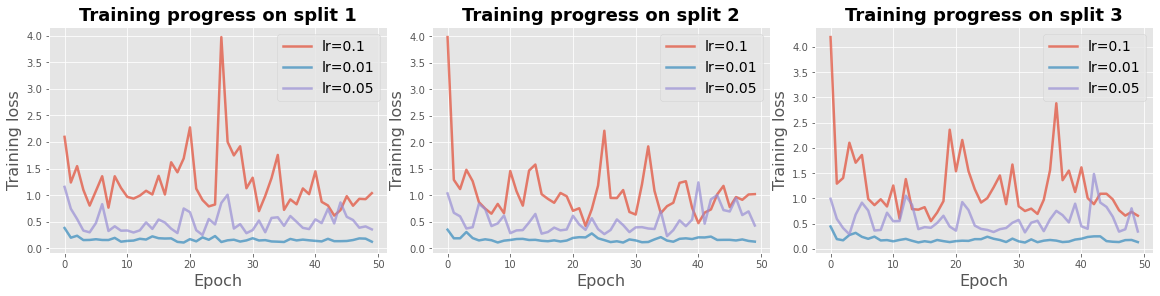

In [25]:
x_values = np.arange(df_1_lr_0_1.shape[0])
fig, axes = plt.subplots(1,3,figsize=(16,4))
for split in range(3):
    axes[split].set_title(f"Training progress on split {split+1}", size=18, fontweight="bold")
    axes[split].plot(x_values, dfs_lr_0_1[split].train_loss, "-", alpha=0.7, label="lr=0.1", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_01[split].train_loss, "-", alpha=0.7, label="lr=0.01", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_05[split].train_loss, "-", alpha=0.7, label="lr=0.05", linewidth=2.5)
    axes[split].legend(loc="best", fontsize=14)
    axes[split].set_xlabel("Epoch", fontsize=16)
    axes[split].set_ylabel("Training loss", fontsize=16)
    plt.tight_layout(pad=0.3)
plt.show()

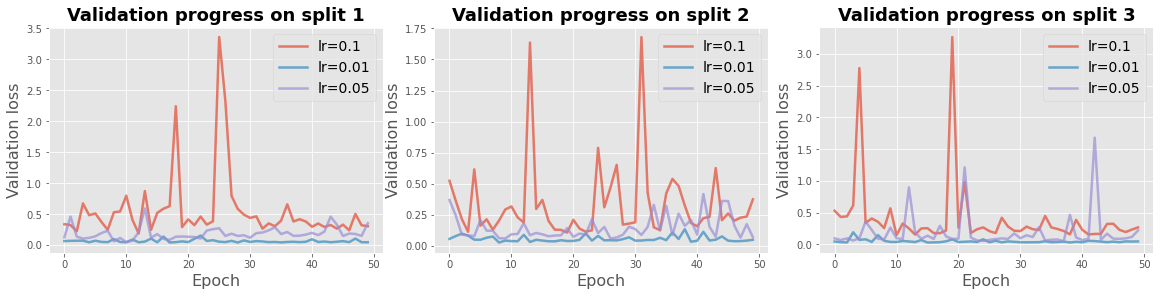

In [26]:
x_values = np.arange(df_1_lr_0_1.shape[0])
fig, axes = plt.subplots(1,3,figsize=(16,4))
for split in range(3):
    axes[split].set_title(f"Validation progress on split {split+1}", size=18, fontweight="bold")
    axes[split].plot(x_values, dfs_lr_0_1[split].val_loss, "-", alpha=0.7, label="lr=0.1", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_01[split].val_loss, "-", alpha=0.7, label="lr=0.01", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_05[split].val_loss, "-", alpha=0.7, label="lr=0.05", linewidth=2.5)
    axes[split].legend(loc="best", fontsize=14)
    axes[split].set_xlabel("Epoch", fontsize=16)
    axes[split].set_ylabel("Validation loss", fontsize=16)
    plt.tight_layout(pad=0.3)
plt.show()

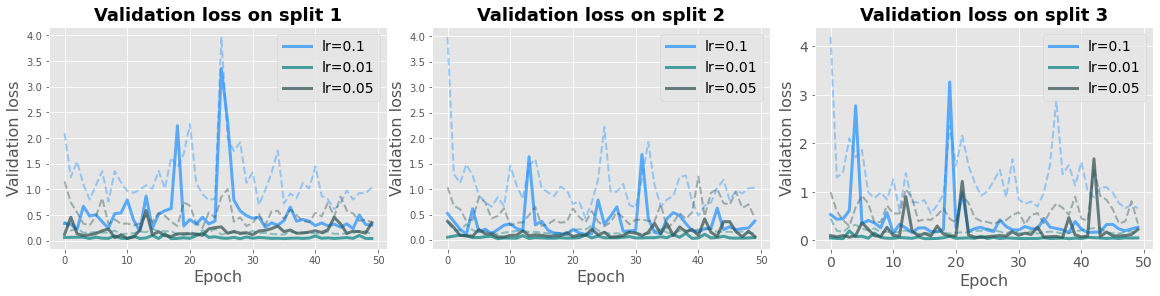

In [191]:
colours = ['dodgerblue', 'teal', 'darkslategray']
x_values = np.arange(df_1_lr_0_1.shape[0])
fig, axes = plt.subplots(1,3,figsize=(16,4))
for split in range(3):
    axes[split].set_title(f"Validation loss on split {split+1}", size=18, fontweight="bold")
    axes[split].plot(x_values, dfs_lr_0_1[split].val_loss, "-", alpha=0.7, color="dodgerblue", label="lr=0.1", linewidth=3)
    axes[split].plot(x_values, dfs_lr_0_1[split].train_loss, "--", alpha=0.4, color="dodgerblue", linewidth=2)
    axes[split].plot(x_values, dfs_lr_0_01[split].val_loss, "-", alpha=0.7, color="teal", label="lr=0.01", linewidth=3)
    axes[split].plot(x_values, dfs_lr_0_01[split].train_loss, "--", alpha=0.4, color="teal", linewidth=2)
    axes[split].plot(x_values, dfs_lr_0_05[split].val_loss, "-", alpha=0.7, color="darkslategray", label="lr=0.05", linewidth=3)
    axes[split].plot(x_values, dfs_lr_0_05[split].train_loss, "--", alpha=0.4, color="darkslategray", linewidth=2)
    axes[split].legend(loc="best", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    axes[split].set_xlabel("Epoch", fontsize=16)
    axes[split].set_ylabel("Validation loss", fontsize=16)
    plt.tight_layout(pad=0.3)
    
plt.savefig('figs/resnet18/val_loss_each_split.png')
plt.show()

## Training Loss

In [27]:
lrs = [0.1, 0.01, 0.05]

means_train_loss = []
stds_train_loss = []

# lr=0.1
means_train_loss.append(np.array([dfs_lr_0_1[0].train_loss, 
                               dfs_lr_0_1[1].train_loss, 
                               dfs_lr_0_1[2].train_loss]).mean(axis=0))
stds_train_loss.append(np.array([dfs_lr_0_1[0].train_loss, 
                              dfs_lr_0_1[1].train_loss, 
                              dfs_lr_0_1[2].train_loss]).std(axis=0))
# lr=0.01
means_train_loss.append(np.array([dfs_lr_0_01[0].train_loss, 
                               dfs_lr_0_01[1].train_loss, 
                               dfs_lr_0_01[2].train_loss]).mean(axis=0))
stds_train_loss.append(np.array([dfs_lr_0_01[0].train_loss, 
                              dfs_lr_0_01[1].train_loss, 
                              dfs_lr_0_01[2].train_loss]).std(axis=0))
# lr=0.05
means_train_loss.append(np.array([dfs_lr_0_05[0].train_loss, 
                               dfs_lr_0_05[1].train_loss, 
                               dfs_lr_0_05[2].train_loss]).mean(axis=0))
stds_train_loss.append(np.array([dfs_lr_0_05[0].train_loss, 
                              dfs_lr_0_05[1].train_loss, 
                              dfs_lr_0_05[2].train_loss]).std(axis=0))

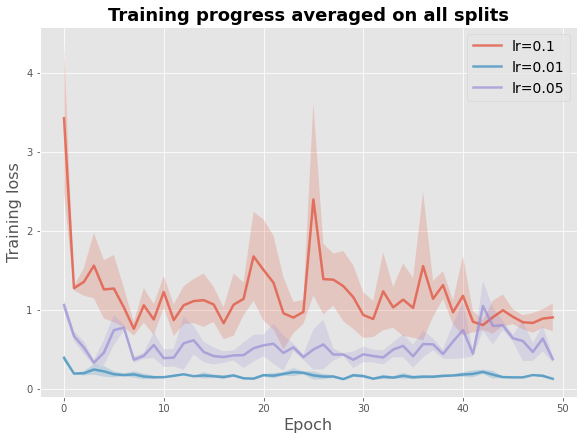

In [28]:
plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.title(f"Training progress averaged on all splits", size=18, fontweight="bold")
for split, lr in enumerate(lrs):
    plt.plot(x_values, means_train_loss[split], "-", alpha=0.7, label=f"lr={lr}", linewidth=2.5)
    plt.fill_between(
        x_values,
        means_train_loss[split] - stds_train_loss[split],
        means_train_loss[split] + stds_train_loss[split],
        alpha=0.2,
        antialiased=True,
    )

plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Training loss", fontsize=16)
plt.tight_layout(pad=0.3)
plt.show()

## Training Accuracy

In [29]:
lrs = [0.1, 0.01, 0.05]

means_train_acc = []
stds_train_acc = []

# lr=0.1
means_train_acc.append(np.array([dfs_lr_0_1[0].train_acc, 
                               dfs_lr_0_1[1].train_acc, 
                               dfs_lr_0_1[2].train_acc]).mean(axis=0))
stds_train_acc.append(np.array([dfs_lr_0_1[0].train_acc, 
                              dfs_lr_0_1[1].train_acc, 
                              dfs_lr_0_1[2].train_acc]).std(axis=0))
#lr=0.01
means_train_acc.append(np.array([dfs_lr_0_01[0].train_acc, 
                               dfs_lr_0_01[1].train_acc, 
                               dfs_lr_0_01[2].train_acc]).mean(axis=0))
stds_train_acc.append(np.array([dfs_lr_0_01[0].train_acc, 
                              dfs_lr_0_01[1].train_acc, 
                              dfs_lr_0_01[2].train_acc]).std(axis=0))
#lr=0.05
means_train_acc.append(np.array([dfs_lr_0_05[0].train_acc, 
                               dfs_lr_0_05[1].train_acc, 
                               dfs_lr_0_05[2].train_acc]).mean(axis=0))
stds_train_acc.append(np.array([dfs_lr_0_05[0].train_acc, 
                              dfs_lr_0_05[1].train_acc, 
                              dfs_lr_0_05[2].train_acc]).std(axis=0))

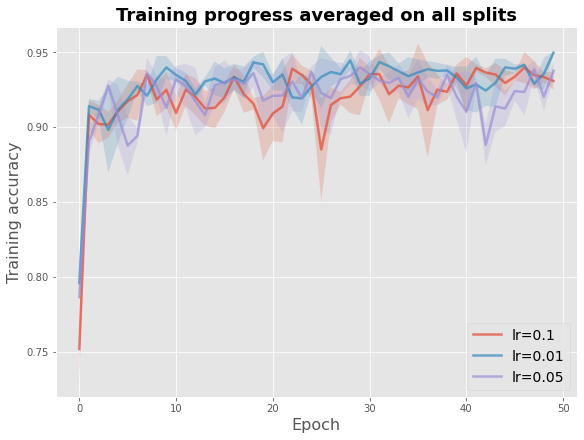

In [30]:
plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.title(f"Training progress averaged on all splits", size=18, fontweight="bold")
for split, lr in enumerate(lrs):
    plt.plot(x_values, means_train_acc[split], "-", alpha=0.7, label=f"lr={lr}", linewidth=2.5)
    plt.fill_between(
        x_values,
        means_train_acc[split] - stds_train_acc[split],
        means_train_acc[split] + stds_train_acc[split],
        alpha=0.2,
        antialiased=True,
    )

plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Training accuracy", fontsize=16)
plt.tight_layout(pad=0.3)
plt.show()

## Validation Loss

In [31]:
lrs = [0.1, 0.01, 0.05]

means_val_loss = []
stds_val_loss = []

# lr=0.1
means_val_loss.append(np.array([dfs_lr_0_1[0].val_loss, 
                               dfs_lr_0_1[1].val_loss, 
                               dfs_lr_0_1[2].val_loss]).mean(axis=0))
stds_val_loss.append(np.array([dfs_lr_0_1[0].val_loss, 
                              dfs_lr_0_1[1].val_loss, 
                              dfs_lr_0_1[2].val_loss]).std(axis=0))
# lr=0.01
means_val_loss.append(np.array([dfs_lr_0_01[0].val_loss, 
                               dfs_lr_0_01[1].val_loss, 
                               dfs_lr_0_01[2].val_loss]).mean(axis=0))
stds_val_loss.append(np.array([dfs_lr_0_01[0].val_loss, 
                              dfs_lr_0_01[1].val_loss, 
                              dfs_lr_0_01[2].val_loss]).std(axis=0))
# lr=0.05
means_val_loss.append(np.array([dfs_lr_0_05[0].val_loss, 
                               dfs_lr_0_05[1].val_loss, 
                               dfs_lr_0_05[2].val_loss]).mean(axis=0))
stds_val_loss.append(np.array([dfs_lr_0_05[0].val_loss, 
                              dfs_lr_0_05[1].val_loss, 
                              dfs_lr_0_05[2].val_loss]).std(axis=0))

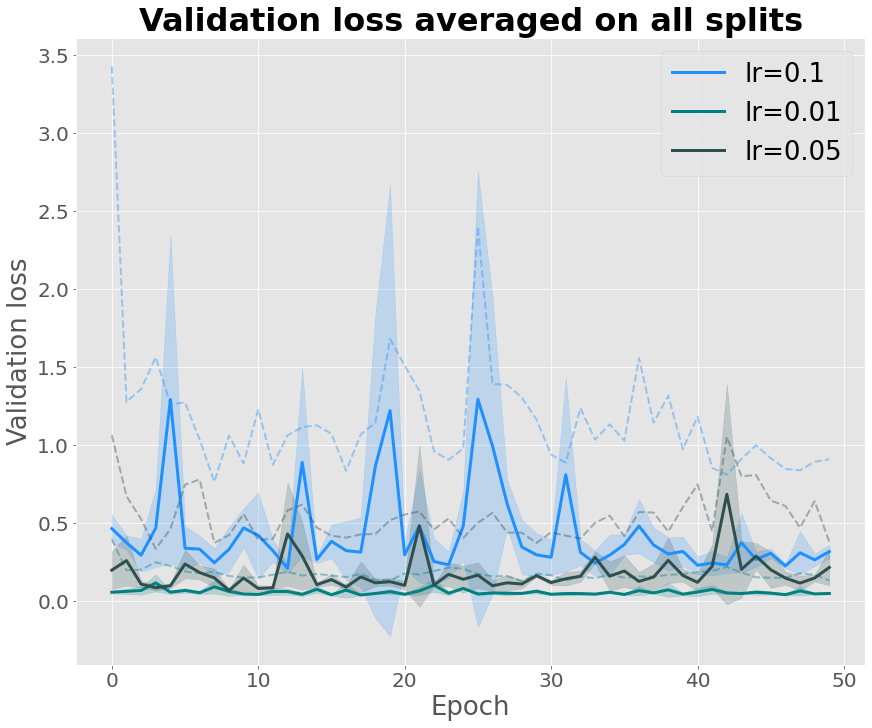

In [189]:
colours = ['dodgerblue', 'teal', 'darkslategray']

plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Validation loss averaged on all splits", size=32, fontweight="bold")
for split, lr in enumerate(lrs):
    plt.plot(x_values, means_val_loss[split], "-", alpha=1.0, color=colours[split], label=f"lr={lr}", linewidth=3)
    plt.plot(x_values, means_train_loss[split], "--", alpha=0.4, color=colours[split], linewidth=2)
    plt.fill_between(
        x_values,
        means_val_loss[split] - stds_val_loss[split],
        means_val_loss[split] + stds_val_loss[split],
        alpha=0.2,
        antialiased=True,
        color=colours[split]
    )

plt.legend(loc="best", fontsize=26)
plt.xlabel("Epoch", fontsize=26)
plt.ylabel("Validation loss", fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/val_loss_all_splits.png')
plt.show()

## Validation Accuracy

In [33]:
lrs = [0.1, 0.01, 0.05]

means_val_acc = []
stds_val_acc = []

# lr=0.1
means_val_acc.append(np.array([dfs_lr_0_1[0].val_acc, 
                               dfs_lr_0_1[1].val_acc, 
                               dfs_lr_0_1[2].val_acc]).mean(axis=0))
stds_val_acc.append(np.array([dfs_lr_0_1[0].val_acc, 
                              dfs_lr_0_1[1].val_acc, 
                              dfs_lr_0_1[2].val_acc]).std(axis=0))
#lr=0.01
means_val_acc.append(np.array([dfs_lr_0_01[0].val_acc, 
                               dfs_lr_0_01[1].val_acc, 
                               dfs_lr_0_01[2].val_acc]).mean(axis=0))
stds_val_acc.append(np.array([dfs_lr_0_01[0].val_acc, 
                              dfs_lr_0_01[1].val_acc, 
                              dfs_lr_0_01[2].val_acc]).std(axis=0))
#lr=0.05
means_val_acc.append(np.array([dfs_lr_0_05[0].val_acc, 
                               dfs_lr_0_05[1].val_acc, 
                               dfs_lr_0_05[2].val_acc]).mean(axis=0))
stds_val_acc.append(np.array([dfs_lr_0_05[0].val_acc, 
                              dfs_lr_0_05[1].val_acc, 
                              dfs_lr_0_05[2].val_acc]).std(axis=0))

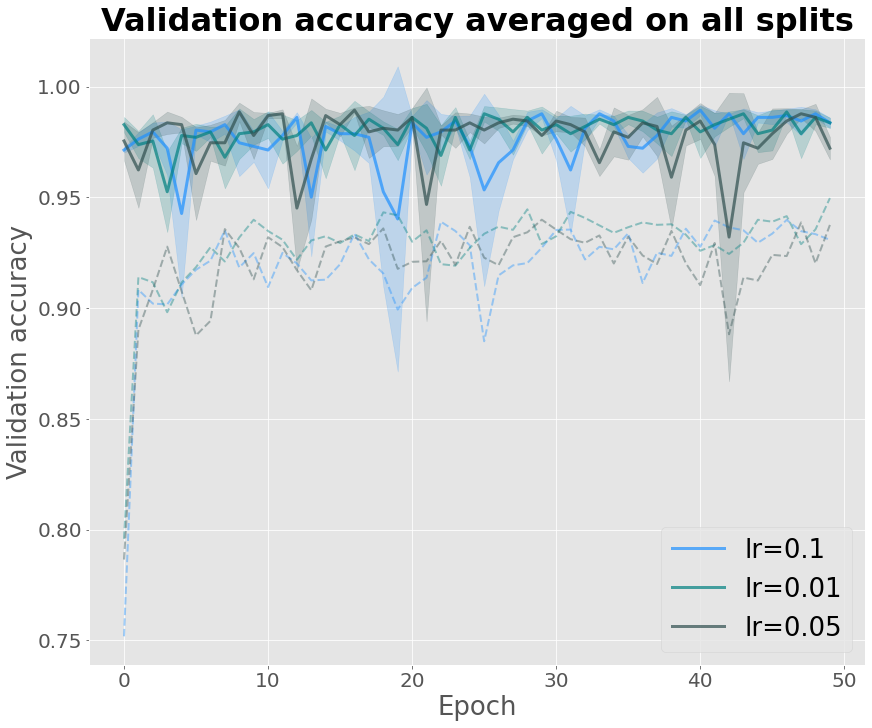

In [190]:
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Validation accuracy averaged on all splits", size=32, fontweight="bold")
for split, lr in enumerate(lrs):
    plt.plot(x_values, means_val_acc[split], "-", alpha=0.7, color=colours[split], label=f"lr={lr}", linewidth=3)
    plt.plot(x_values, means_train_acc[split], "--", alpha=0.4, color=colours[split], linewidth=2)
    plt.fill_between(
        x_values,
        means_val_acc[split] - stds_val_acc[split],
        means_val_acc[split] + stds_val_acc[split],
        alpha=0.2,
        antialiased=True,
        color=colours[split]
    )

plt.legend(loc="best", fontsize=26)
plt.xlabel("Epoch", fontsize=26)
plt.ylabel("Validation accuracy", fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/val_acc_all_splits.png')
plt.show()

## Full_splits

In [35]:
# Split 1
df_full_1 = pd.read_csv('output/resnet18/full_split_1/progress/train_progress.csv')
# Split 2
df_full_2 = pd.read_csv('output/resnet18/full_split_2/progress/train_progress.csv')
# Split 3
df_full_3 = pd.read_csv('output/resnet18/full_split_3/progress/train_progress.csv')

In [58]:
lr = 0.01
means_train_full_acc = np.array([df_full_1.train_acc, 
                               df_full_2.train_acc, 
                               df_full_3.train_acc]).mean(axis=0)
stds_train_full_acc = np.array([df_full_1.train_acc, 
                              df_full_2.train_acc, 
                              df_full_3.train_acc]).std(axis=0)

In [59]:
lr = 0.01
means_val_full_acc = np.array([df_full_1.val_acc, 
                               df_full_2.val_acc, 
                               df_full_3.val_acc]).mean(axis=0)
stds_val_full_acc = np.array([df_full_1.val_acc, 
                              df_full_2.val_acc, 
                              df_full_3.val_acc]).std(axis=0)

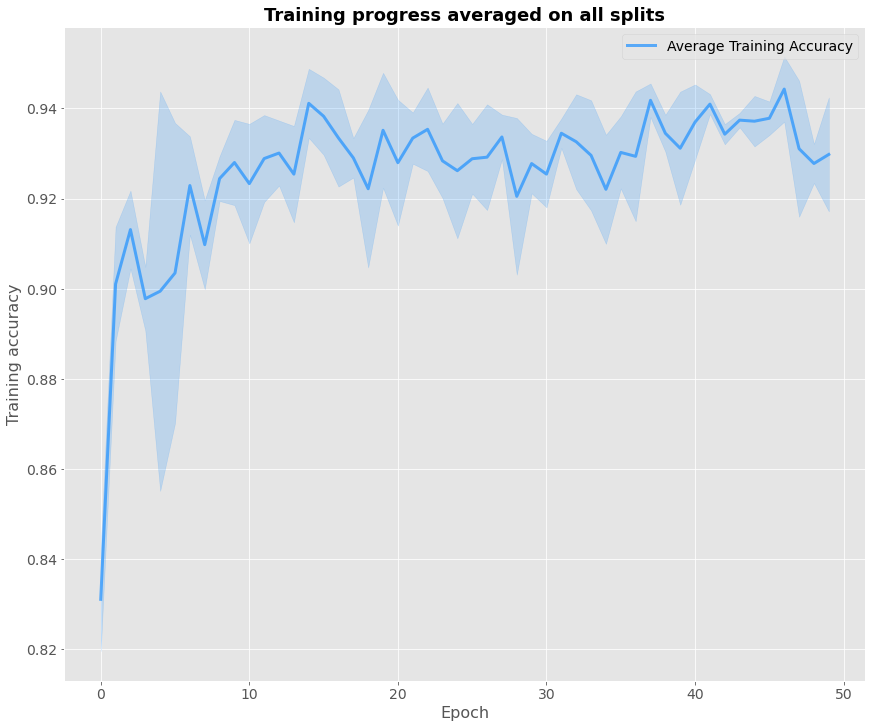

In [193]:
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Training progress averaged on all splits", size=18, fontweight="bold")
plt.plot(x_values, means_train_full_acc, "-", alpha=0.7, label="Average Training Accuracy", color="dodgerblue", linewidth=3)
plt.fill_between(
    x_values,
    means_train_full_acc - stds_train_full_acc,
    means_train_full_acc + stds_train_full_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue",
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Training accuracy", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/train_acc_all_full_splits.png')
plt.show()

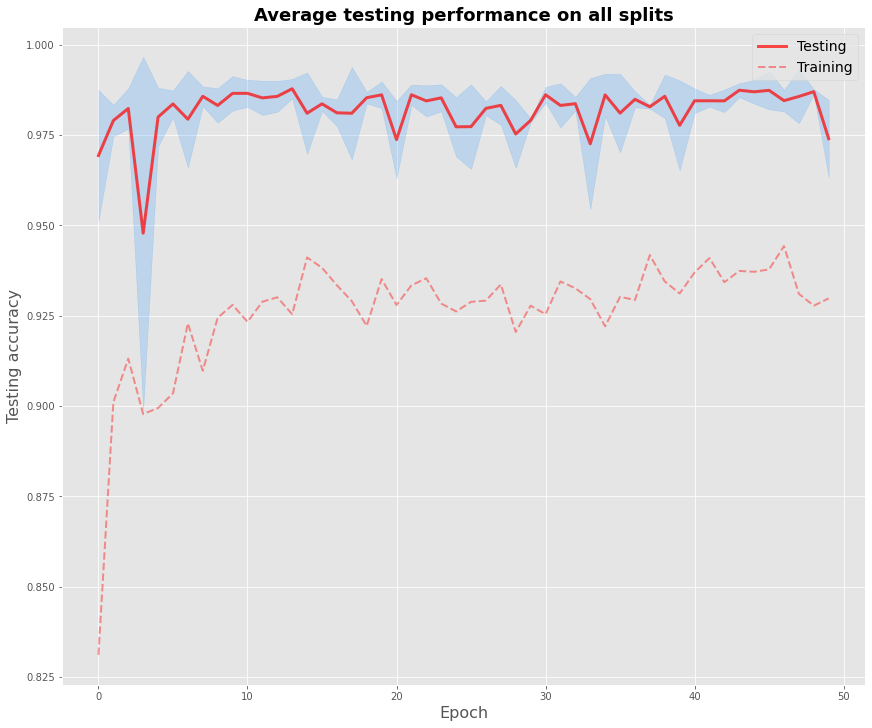

In [168]:
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Average testing performance on all splits", size=18, fontweight="bold")
plt.plot(x_values, means_val_full_acc, "-", alpha=0.7, color="red", label="Testing", linewidth=3)
plt.plot(x_values, means_train_full_acc, "--", alpha=0.4, color="red", label="Training", linewidth=2)
plt.fill_between(
    x_values,
    means_val_full_acc - stds_val_full_acc,
    means_val_full_acc + stds_val_full_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Testing accuracy", fontsize=16)
plt.tight_layout(pad=0.3)
#plt.savefig('figs/resnet18/test_acc_all_full_splits.png')
plt.show()

# ROBUSTNESS

## 5.1 Gaussian pixel noise

In [2]:
# ResNet18
# Split 1
res_df_1_5_1 = pd.read_csv('output/resnet18/robustness/5_1/full_split_1/robustness_results_5_1.csv')
# Split 2
res_df_2_5_1 = pd.read_csv('output/resnet18/robustness/5_1/full_split_2/robustness_results_5_1.csv')
# Split 3
res_df_3_5_1 = pd.read_csv('output/resnet18/robustness/5_1/full_split_3/robustness_results_5_1.csv')

res_means_5_1_acc = np.array([res_df_1_5_1.best_accs, 
                           res_df_2_5_1.best_accs, 
                           res_df_3_5_1.best_accs]).mean(axis=0)
res_stds_5_1_acc = np.array([res_df_1_5_1.best_accs, 
                          res_df_2_5_1.best_accs, 
                          res_df_3_5_1.best_accs]).std(axis=0)

# BoVW
# Split 1
bovw_df_1_5_1 = pd.read_csv('output/bovw/robustness/5_1/full_split_1/robustness_results_5_1.csv')
# Split 2
bovw_df_2_5_1 = pd.read_csv('output/bovw/robustness/5_1/full_split_2/robustness_results_5_1.csv')
# Split 3
bovw_df_3_5_1 = pd.read_csv('output/bovw/robustness/5_1/full_split_3/robustness_results_5_1.csv')

bovw_means_5_1_acc = np.array([bovw_df_1_5_1.best_accs, 
                           bovw_df_2_5_1.best_accs, 
                           bovw_df_3_5_1.best_accs]).mean(axis=0)
bovw_stds_5_1_acc = np.array([bovw_df_1_5_1.best_accs, 
                          bovw_df_2_5_1.best_accs, 
                          bovw_df_3_5_1.best_accs]).std(axis=0)

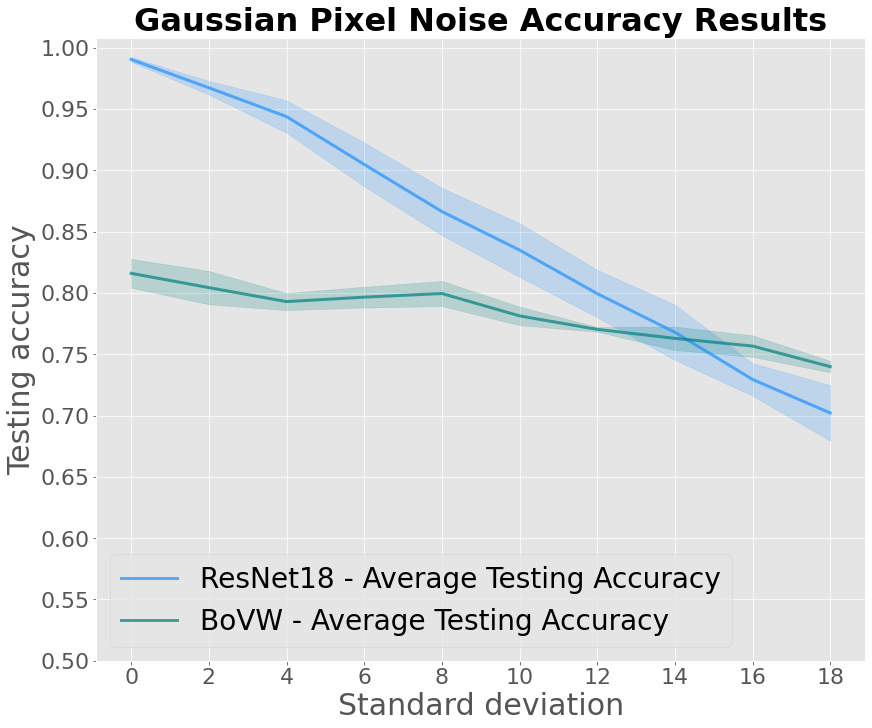

In [3]:
stds = np.arange(0, 19, 2)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Gaussian Pixel Noise Accuracy Results", size=32, fontweight="bold")
plt.plot(stds, res_means_5_1_acc, "-", alpha=0.7, color="dodgerblue", label="ResNet18 - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    stds,
    res_means_5_1_acc - res_stds_5_1_acc,
    res_means_5_1_acc + res_stds_5_1_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)
plt.plot(stds, bovw_means_5_1_acc, "-", alpha=0.7, color="teal", label="BoVW - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    stds,
    bovw_means_5_1_acc - bovw_stds_5_1_acc,
    bovw_means_5_1_acc + bovw_stds_5_1_acc,
    alpha=0.2,
    antialiased=True,
    color="teal"
)

plt.legend(loc="best", fontsize=28)
plt.xlabel("Standard deviation", fontsize=30)
plt.ylabel("Testing accuracy", fontsize=30)
plt.xticks(stds, fontsize=22)
plt.yticks(np.arange(0.5, 1.01, 0.05), fontsize=22)
plt.tight_layout(pad=0.3)
plt.savefig('figs/test_acc_5_1.png')
plt.show()

## 5.2 Gaussian blurring

In [4]:
# ResNet18
# Split 1
res_df_1_5_2 = pd.read_csv('output/resnet18/robustness/5_2/full_split_1/robustness_results_5_2.csv')
# Split 2
res_df_2_5_2 = pd.read_csv('output/resnet18/robustness/5_2/full_split_2/robustness_results_5_2.csv')
# Split 3
res_df_3_5_2 = pd.read_csv('output/resnet18/robustness/5_2/full_split_3/robustness_results_5_2.csv')

res_means_5_2_acc = np.array([res_df_1_5_2.best_accs, 
                           res_df_2_5_2.best_accs, 
                           res_df_3_5_2.best_accs]).mean(axis=0)
res_stds_5_2_acc = np.array([res_df_1_5_2.best_accs, 
                          res_df_2_5_2.best_accs, 
                          res_df_3_5_2.best_accs]).std(axis=0)

# BoVW
# Split 1
bovw_df_1_5_2 = pd.read_csv('output/bovw/robustness/5_2/full_split_1/robustness_results_5_2.csv')
# Split 2
bovw_df_2_5_2 = pd.read_csv('output/bovw/robustness/5_2/full_split_2/robustness_results_5_2.csv')
# Split 3
bovw_df_3_5_2 = pd.read_csv('output/bovw/robustness/5_2/full_split_3/robustness_results_5_2.csv')

bovw_means_5_2_acc = np.array([bovw_df_1_5_2.best_accs, 
                           bovw_df_2_5_2.best_accs, 
                           bovw_df_3_5_2.best_accs]).mean(axis=0)
bovw_stds_5_2_acc = np.array([bovw_df_1_5_2.best_accs, 
                          bovw_df_2_5_2.best_accs, 
                          bovw_df_3_5_2.best_accs]).std(axis=0)

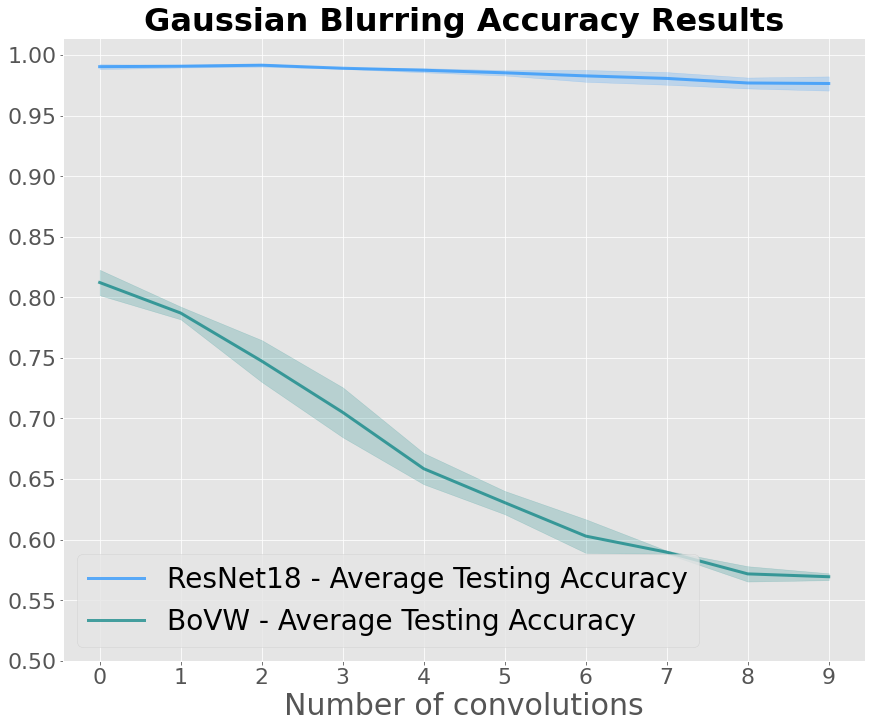

In [76]:
num_convs = np.arange(10)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Gaussian Blurring Accuracy Results", size=32, fontweight="bold")
plt.plot(num_convs, res_means_5_2_acc, "-", alpha=0.7, color="dodgerblue", label="ResNet18 - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    num_convs,
    res_means_5_2_acc - res_stds_5_2_acc,
    res_means_5_2_acc + res_stds_5_2_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)
plt.plot(num_convs, bovw_means_5_2_acc, "-", alpha=0.7, color="teal", label="BoVW - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    num_convs,
    bovw_means_5_2_acc - bovw_stds_5_2_acc,
    bovw_means_5_2_acc + bovw_stds_5_2_acc,
    alpha=0.2,
    antialiased=True,
    color="teal"
)

plt.legend(loc="best", fontsize=28)
plt.xlabel("Number of convolutions", fontsize=30)
#plt.ylabel("Testing accuracy", fontsize=24)
plt.xticks(num_convs, fontsize=22)
plt.yticks(np.arange(0.5, 1.01, 0.05), fontsize=22)
plt.tight_layout(pad=0.3)
plt.savefig('figs/test_acc_5_2.png')
plt.show()

## 5.3 Image contrast increase

In [5]:
# ResNet18
# Split 1
res_df_1_5_3 = pd.read_csv('output/resnet18/robustness/5_3/full_split_1/robustness_results_5_3.csv')
# Split 2
res_df_2_5_3 = pd.read_csv('output/resnet18/robustness/5_3/full_split_2/robustness_results_5_3.csv')
# Split 3
res_df_3_5_3 = pd.read_csv('output/resnet18/robustness/5_3/full_split_3/robustness_results_5_3.csv')

res_means_5_3_acc = np.array([res_df_1_5_3.best_accs, 
                           res_df_2_5_3.best_accs, 
                           res_df_3_5_3.best_accs]).mean(axis=0)
res_stds_5_3_acc = np.array([res_df_1_5_3.best_accs, 
                          res_df_2_5_3.best_accs, 
                          res_df_3_5_3.best_accs]).std(axis=0)

# BoVW
# Split 1
bovw_df_1_5_3 = pd.read_csv('output/bovw/robustness/5_3/full_split_1/robustness_results_5_3.csv')
# Split 2
bovw_df_2_5_3 = pd.read_csv('output/bovw/robustness/5_3/full_split_2/robustness_results_5_3.csv')
# Split 3
bovw_df_3_5_3 = pd.read_csv('output/bovw/robustness/5_3/full_split_3/robustness_results_5_3.csv')

bovw_means_5_3_acc = np.array([bovw_df_1_5_3.best_accs, 
                           bovw_df_2_5_3.best_accs, 
                           bovw_df_3_5_3.best_accs]).mean(axis=0)
bovw_stds_5_3_acc = np.array([bovw_df_1_5_3.best_accs, 
                          bovw_df_2_5_3.best_accs, 
                          bovw_df_3_5_3.best_accs]).std(axis=0)

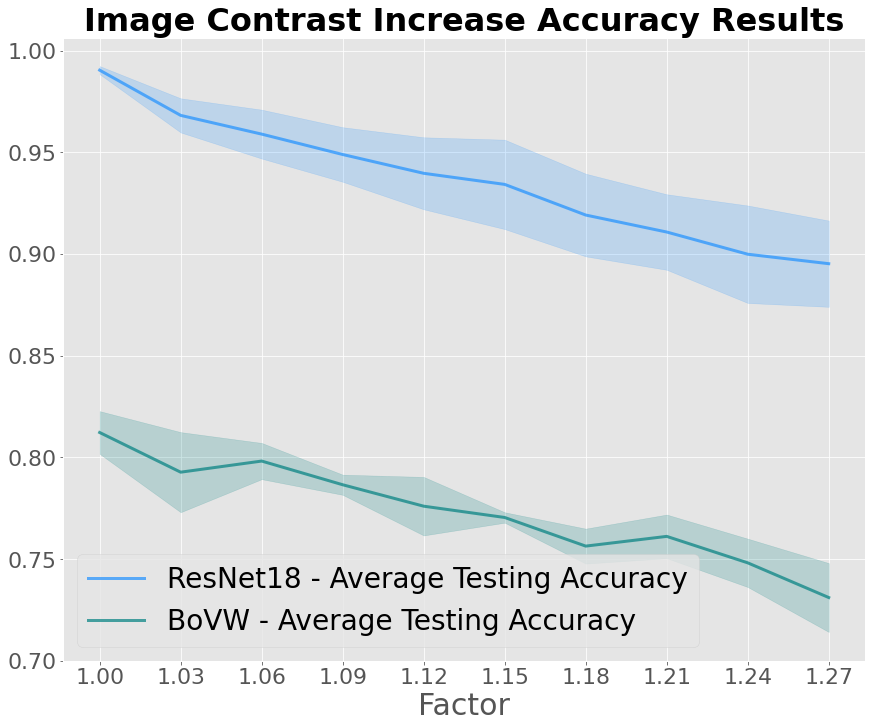

In [78]:
factors = np.linspace(1.0, 1.27, 10)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Image Contrast Increase Accuracy Results", size=32, fontweight="bold")
plt.plot(factors, res_means_5_3_acc, "-", alpha=0.7, color="dodgerblue", label="ResNet18 - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    factors,
    res_means_5_3_acc - res_stds_5_3_acc,
    res_means_5_3_acc + res_stds_5_3_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)
plt.plot(factors, bovw_means_5_3_acc, "-", alpha=0.7, color="teal", label="BoVW - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    factors,
    bovw_means_5_3_acc - bovw_stds_5_3_acc,
    bovw_means_5_3_acc + bovw_stds_5_3_acc,
    alpha=0.2,
    antialiased=True,
    color="teal"
)

plt.legend(loc="best", fontsize=28)
plt.xlabel("Factor", fontsize=30)
#plt.ylabel("Testing accuracy", fontsize=24)
plt.xticks(factors, fontsize=22)
plt.yticks(np.arange(0.7, 1.001, 0.05), fontsize=22)
plt.tight_layout(pad=0.3)
plt.savefig('figs/test_acc_5_3.png')
plt.show()

## 5.4 Image contrast decrease

In [6]:
# ResNet18
# Split 1
res_df_1_5_4 = pd.read_csv('output/resnet18/robustness/5_4/full_split_1/robustness_results_5_4.csv')
# Split 2
res_df_2_5_4 = pd.read_csv('output/resnet18/robustness/5_4/full_split_2/robustness_results_5_4.csv')
# Split 3
res_df_3_5_4 = pd.read_csv('output/resnet18/robustness/5_4/full_split_3/robustness_results_5_4.csv')

res_means_5_4_acc = np.array([res_df_1_5_4.best_accs, 
                           res_df_2_5_4.best_accs, 
                           res_df_3_5_4.best_accs]).mean(axis=0)
res_stds_5_4_acc = np.array([res_df_1_5_4.best_accs, 
                          res_df_2_5_4.best_accs, 
                          res_df_3_5_4.best_accs]).std(axis=0)

# BoVW
# Split 1
bovw_df_1_5_4 = pd.read_csv('output/bovw/robustness/5_4/full_split_1/robustness_results_5_4.csv')
# Split 2
bovw_df_2_5_4 = pd.read_csv('output/bovw/robustness/5_4/full_split_2/robustness_results_5_4.csv')
# Split 3
bovw_df_3_5_4 = pd.read_csv('output/bovw/robustness/5_4/full_split_3/robustness_results_5_4.csv')

bovw_means_5_4_acc = np.array([bovw_df_1_5_4.best_accs, 
                           bovw_df_2_5_4.best_accs, 
                           bovw_df_3_5_4.best_accs]).mean(axis=0)
bovw_stds_5_4_acc = np.array([bovw_df_1_5_4.best_accs, 
                          bovw_df_2_5_4.best_accs, 
                          bovw_df_3_5_4.best_accs]).std(axis=0)

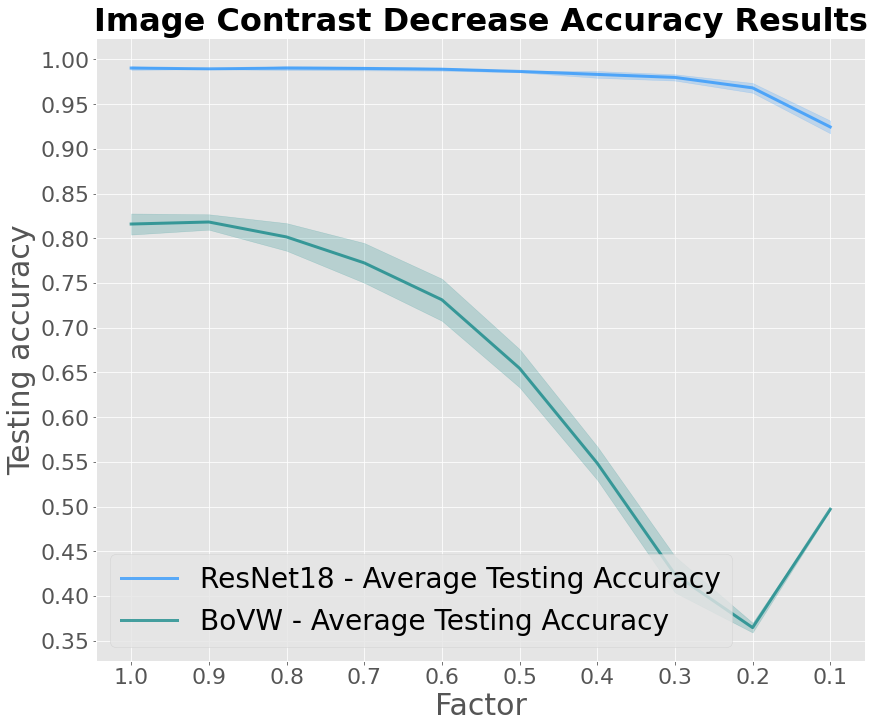

In [80]:
x_values = np.arange(0.1, 1.1, 0.1)
factors = ['1.0', '0.9', '0.8', '0.7', '0.6', '0.5', '0.4', '0.3', '0.2', '0.1']
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Image Contrast Decrease Accuracy Results", size=32, fontweight="bold")
plt.plot(x_values, res_means_5_4_acc, "-", alpha=0.7, color="dodgerblue", label="ResNet18 - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    x_values,
    res_means_5_4_acc - res_stds_5_4_acc,
    res_means_5_4_acc + res_stds_5_4_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)
plt.plot(x_values, bovw_means_5_4_acc, "-", alpha=0.7, color="teal", label="BoVW - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    x_values,
    bovw_means_5_4_acc - bovw_stds_5_4_acc,
    bovw_means_5_4_acc + bovw_stds_5_4_acc,
    alpha=0.2,
    antialiased=True,
    color="teal"
)

plt.legend(loc="best", fontsize=28)
plt.xlabel("Factor", fontsize=30)
plt.ylabel("Testing accuracy", fontsize=30)
plt.xticks(x_values, factors, fontsize=22)
plt.yticks(np.arange(0.35, 1.01, 0.05), fontsize=22)
plt.tight_layout(pad=0.3)
plt.savefig('figs/test_acc_5_4.png')
plt.show()

## 5.5 Image brightness increase

In [7]:
# ResNet18
# Split 1
res_df_1_5_5 = pd.read_csv('output/resnet18/robustness/5_5/full_split_1/robustness_results_5_5.csv')
# Split 2
res_df_2_5_5 = pd.read_csv('output/resnet18/robustness/5_5/full_split_2/robustness_results_5_5.csv')
# Split 3
res_df_3_5_5 = pd.read_csv('output/resnet18/robustness/5_5/full_split_3/robustness_results_5_5.csv')

res_means_5_5_acc = np.array([res_df_1_5_5.best_accs, 
                           res_df_2_5_5.best_accs, 
                           res_df_3_5_5.best_accs]).mean(axis=0)
res_stds_5_5_acc = np.array([res_df_1_5_5.best_accs, 
                          res_df_2_5_5.best_accs, 
                          res_df_3_5_5.best_accs]).std(axis=0)

# BoVW
# Split 1
bovw_df_1_5_5 = pd.read_csv('output/bovw/robustness/5_5/full_split_1/robustness_results_5_5.csv')
# Split 2
bovw_df_2_5_5 = pd.read_csv('output/bovw/robustness/5_5/full_split_2/robustness_results_5_5.csv')
# Split 3
bovw_df_3_5_5 = pd.read_csv('output/bovw/robustness/5_5/full_split_3/robustness_results_5_5.csv')

bovw_means_5_5_acc = np.array([bovw_df_1_5_5.best_accs, 
                           bovw_df_2_5_5.best_accs, 
                           bovw_df_3_5_5.best_accs]).mean(axis=0)
bovw_stds_5_5_acc = np.array([bovw_df_1_5_5.best_accs, 
                          bovw_df_2_5_5.best_accs, 
                          bovw_df_3_5_5.best_accs]).std(axis=0)

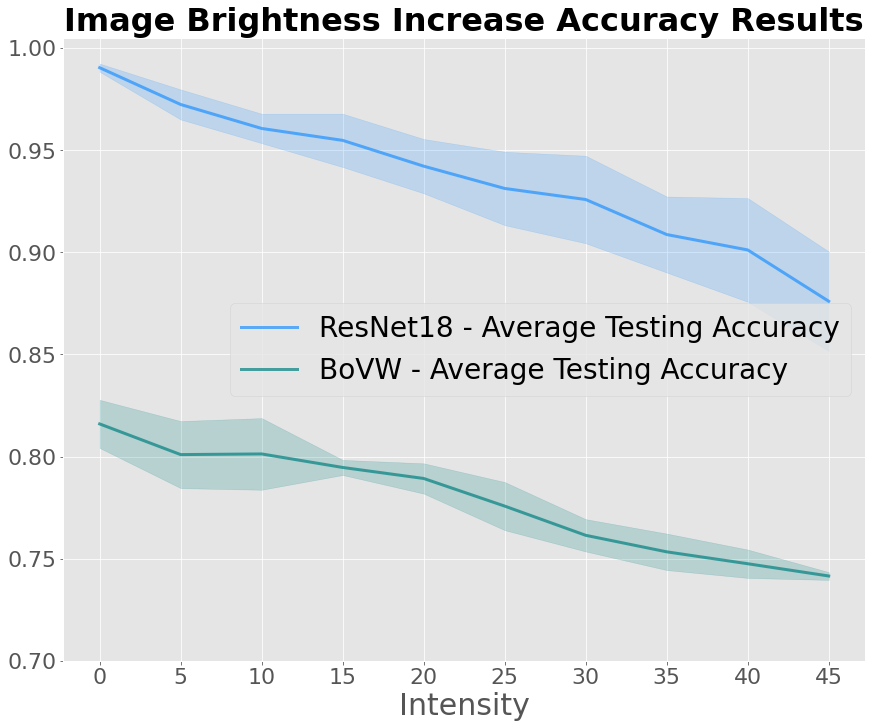

In [82]:
intensity = np.arange(0, 50, 5)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Image Brightness Increase Accuracy Results", size=32, fontweight="bold")
plt.plot(intensity, res_means_5_5_acc, "-", alpha=0.7, color="dodgerblue", label="ResNet18 - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    intensity,
    res_means_5_5_acc - res_stds_5_5_acc,
    res_means_5_5_acc + res_stds_5_5_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)
plt.plot(intensity, bovw_means_5_5_acc, "-", alpha=0.7, color="teal", label="BoVW - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    intensity,
    bovw_means_5_5_acc - bovw_stds_5_5_acc,
    bovw_means_5_5_acc + bovw_stds_5_5_acc,
    alpha=0.2,
    antialiased=True,
    color="teal"
)

plt.legend(loc="best", fontsize=28)
plt.xlabel("Intensity", fontsize=30)
#plt.ylabel("Testing accuracy", fontsize=24)
plt.xticks(intensity, fontsize=22)
plt.yticks(np.arange(0.70, 1.01, 0.05), fontsize=22)
plt.tight_layout(pad=0.3)
plt.savefig('figs/test_acc_5_5.png')
plt.show()

## 5.6 Image brightness decrease

In [8]:
# ResNet18
# Split 1
res_df_1_5_6 = pd.read_csv('output/resnet18/robustness/5_6/full_split_1/robustness_results_5_6.csv')
# Split 2
res_df_2_5_6 = pd.read_csv('output/resnet18/robustness/5_6/full_split_2/robustness_results_5_6.csv')
# Split 3
res_df_3_5_6 = pd.read_csv('output/resnet18/robustness/5_6/full_split_3/robustness_results_5_6.csv')

res_means_5_6_acc = np.array([res_df_1_5_6.best_accs, 
                           res_df_2_5_6.best_accs, 
                           res_df_3_5_6.best_accs]).mean(axis=0)
res_stds_5_6_acc = np.array([res_df_1_5_6.best_accs, 
                          res_df_2_5_6.best_accs, 
                          res_df_3_5_6.best_accs]).std(axis=0)

# BoVW
# Split 1
bovw_df_1_5_6 = pd.read_csv('output/bovw/robustness/5_6/full_split_1/robustness_results_5_6.csv')
# Split 2
bovw_df_2_5_6 = pd.read_csv('output/bovw/robustness/5_6/full_split_2/robustness_results_5_6.csv')
# Split 3
bovw_df_3_5_6 = pd.read_csv('output/bovw/robustness/5_6/full_split_3/robustness_results_5_6.csv')

bovw_means_5_6_acc = np.array([bovw_df_1_5_6.best_accs, 
                           bovw_df_2_5_6.best_accs, 
                           bovw_df_3_5_6.best_accs]).mean(axis=0)
bovw_stds_5_6_acc = np.array([bovw_df_1_5_6.best_accs, 
                          bovw_df_2_5_6.best_accs, 
                          bovw_df_3_5_6.best_accs]).std(axis=0)

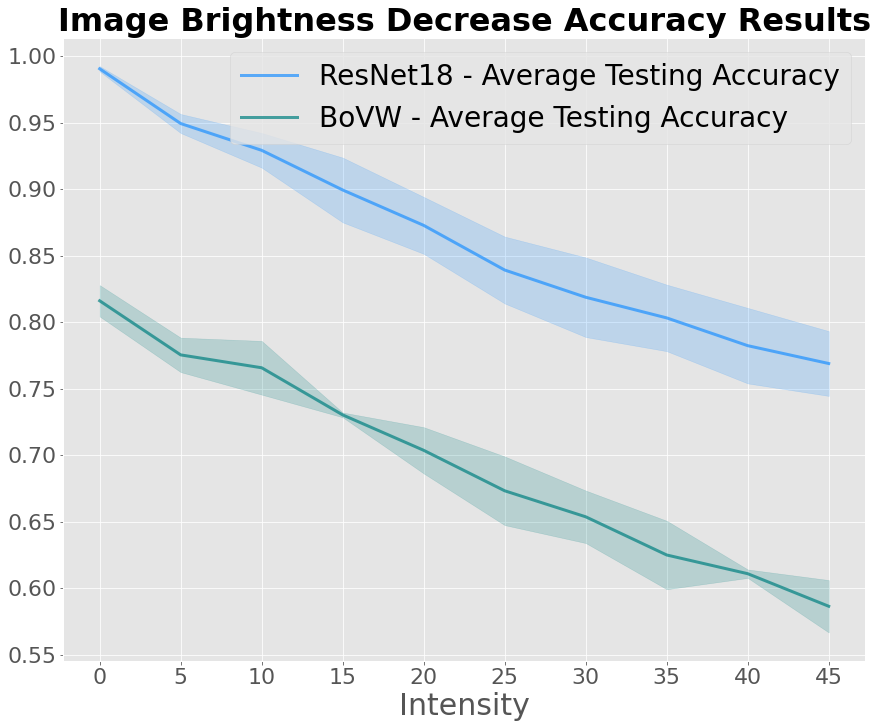

In [84]:
intensity = np.arange(0, 50, 5)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Image Brightness Decrease Accuracy Results", size=32, fontweight="bold")
plt.plot(intensity, res_means_5_6_acc, "-", alpha=0.7, color="dodgerblue", label="ResNet18 - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    intensity,
    res_means_5_6_acc - res_stds_5_6_acc,
    res_means_5_6_acc + res_stds_5_6_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)
plt.plot(intensity, bovw_means_5_6_acc, "-", alpha=0.7, color="teal", label="BoVW - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    intensity,
    bovw_means_5_6_acc - bovw_stds_5_6_acc,
    bovw_means_5_6_acc + bovw_stds_5_6_acc,
    alpha=0.2,
    antialiased=True,
    color="teal"
)

plt.legend(loc="best", fontsize=28)
plt.xlabel("Intensity", fontsize=30)
#plt.ylabel("Testing accuracy", fontsize=24)
plt.xticks(intensity, fontsize=22)
plt.yticks(np.arange(0.55, 1.01, 0.05), fontsize=22)
plt.tight_layout(pad=0.3)
plt.savefig('figs/test_acc_5_6.png')
plt.show()

## 5.7 HSV Hue noise increase

In [9]:
# ResNet18
# Split 1
res_df_1_5_7 = pd.read_csv('output/resnet18/robustness/5_7/full_split_1/robustness_results_5_7.csv')
# Split 2
res_df_2_5_7 = pd.read_csv('output/resnet18/robustness/5_7/full_split_2/robustness_results_5_7.csv')
# Split 3
res_df_3_5_7 = pd.read_csv('output/resnet18/robustness/5_7/full_split_3/robustness_results_5_7.csv')

res_means_5_7_acc = np.array([res_df_1_5_7.best_accs, 
                           res_df_2_5_7.best_accs, 
                           res_df_3_5_7.best_accs]).mean(axis=0)
res_stds_5_7_acc = np.array([res_df_1_5_7.best_accs, 
                          res_df_2_5_7.best_accs, 
                          res_df_3_5_7.best_accs]).std(axis=0)

# BoVW
# Split 1
bovw_df_1_5_7 = pd.read_csv('output/bovw/robustness/5_7/full_split_1/robustness_results_5_7.csv')
# Split 2
bovw_df_2_5_7 = pd.read_csv('output/bovw/robustness/5_7/full_split_2/robustness_results_5_7.csv')
# Split 3
bovw_df_3_5_7 = pd.read_csv('output/bovw/robustness/5_7/full_split_3/robustness_results_5_7.csv')

bovw_means_5_7_acc = np.array([bovw_df_1_5_7.best_accs, 
                           bovw_df_2_5_7.best_accs, 
                           bovw_df_3_5_7.best_accs]).mean(axis=0)
bovw_stds_5_7_acc = np.array([bovw_df_1_5_7.best_accs, 
                          bovw_df_2_5_7.best_accs, 
                          bovw_df_3_5_7.best_accs]).std(axis=0)

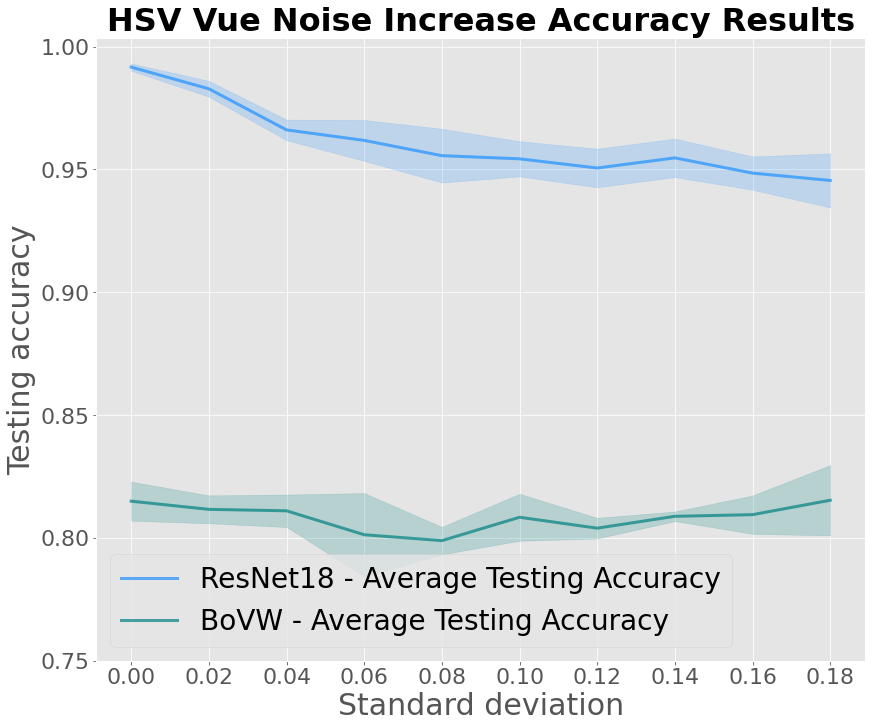

In [96]:
stds = np.arange(0.0, 0.19, .02)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"HSV Vue Noise Increase Accuracy Results", size=32, fontweight="bold")
plt.plot(stds, res_means_5_7_acc, "-", alpha=0.7, color="dodgerblue", label="ResNet18 - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    stds,
    res_means_5_7_acc - res_stds_5_7_acc,
    res_means_5_7_acc + res_stds_5_7_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)
plt.plot(stds, bovw_means_5_7_acc, "-", alpha=0.7, color="teal", label="BoVW - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    stds,
    bovw_means_5_7_acc - bovw_stds_5_7_acc,
    bovw_means_5_7_acc + bovw_stds_5_7_acc,
    alpha=0.2,
    antialiased=True,
    color="teal"
)

plt.legend(loc="best", fontsize=28)
plt.xlabel("Standard deviation", fontsize=30)
plt.ylabel("Testing accuracy", fontsize=30)
plt.xticks(stds, fontsize=22)
plt.yticks(np.arange(0.75, 1.01, 0.05), fontsize=22)
plt.tight_layout(pad=0.3)
plt.savefig('figs/test_acc_5_7.png')
plt.show()

## 5.8 HSV Saturation Noise Increase

In [10]:
# ResNet18
# Split 1
res_df_1_5_8 = pd.read_csv('output/resnet18/robustness/5_8/full_split_1/robustness_results_5_8.csv')
# Split 2
res_df_2_5_8 = pd.read_csv('output/resnet18/robustness/5_8/full_split_2/robustness_results_5_8.csv')
# Split 3
res_df_3_5_8 = pd.read_csv('output/resnet18/robustness/5_8/full_split_3/robustness_results_5_8.csv')

res_means_5_8_acc = np.array([res_df_1_5_8.best_accs, 
                           res_df_2_5_8.best_accs, 
                           res_df_3_5_8.best_accs]).mean(axis=0)
res_stds_5_8_acc = np.array([res_df_1_5_8.best_accs, 
                          res_df_2_5_8.best_accs, 
                          res_df_3_5_8.best_accs]).std(axis=0)

# BoVW
# Split 1
bovw_df_1_5_8 = pd.read_csv('output/bovw/robustness/5_8/full_split_1/robustness_results_5_8.csv')
# Split 2
bovw_df_2_5_8 = pd.read_csv('output/bovw/robustness/5_8/full_split_2/robustness_results_5_8.csv')
# Split 3
bovw_df_3_5_8 = pd.read_csv('output/bovw/robustness/5_8/full_split_3/robustness_results_5_8.csv')

bovw_means_5_8_acc = np.array([bovw_df_1_5_8.best_accs, 
                           bovw_df_2_5_8.best_accs, 
                           bovw_df_3_5_8.best_accs]).mean(axis=0)
bovw_stds_5_8_acc = np.array([bovw_df_1_5_8.best_accs, 
                          bovw_df_2_5_8.best_accs, 
                          bovw_df_3_5_8.best_accs]).std(axis=0)

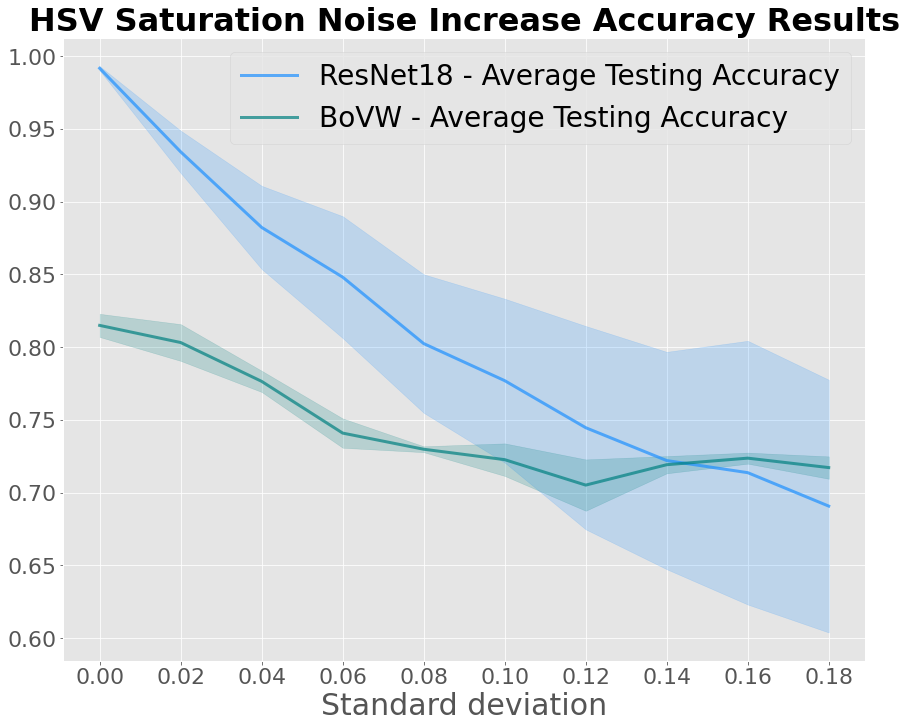

In [98]:
stds = np.arange(0.0, 0.19, .02)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"HSV Saturation Noise Increase Accuracy Results", size=32, fontweight="bold")
plt.plot(stds, res_means_5_8_acc, "-", alpha=0.7, color="dodgerblue", label="ResNet18 - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    stds,
    res_means_5_8_acc - res_stds_5_8_acc,
    res_means_5_8_acc + res_stds_5_8_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)
plt.plot(stds, bovw_means_5_8_acc, "-", alpha=0.7, color="teal", label="BoVW - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    stds,
    bovw_means_5_8_acc - bovw_stds_5_8_acc,
    bovw_means_5_8_acc + bovw_stds_5_8_acc,
    alpha=0.2,
    antialiased=True,
    color="teal"
)

plt.legend(loc="best", fontsize=28)
plt.xlabel("Standard deviation", fontsize=30)
#plt.ylabel("Testing accuracy", fontsize=24)
plt.xticks(stds, fontsize=22)
plt.yticks(np.arange(0.6, 1.01, 0.05), fontsize=22)
plt.tight_layout(pad=0.3)
plt.savefig('figs/test_acc_5_8.png')
plt.show()

## 5.9 Occlusion of the image increase

In [11]:
# ResNet18
# Split 1
res_df_1_5_9 = pd.read_csv('output/resnet18/robustness/5_9/full_split_1/robustness_results_5_9.csv')
# Split 2
res_df_2_5_9 = pd.read_csv('output/resnet18/robustness/5_9/full_split_2/robustness_results_5_9.csv')
# Split 3
res_df_3_5_9 = pd.read_csv('output/resnet18/robustness/5_9/full_split_3/robustness_results_5_9.csv')

res_means_5_9_acc = np.array([res_df_1_5_9.best_accs, 
                           res_df_2_5_9.best_accs, 
                           res_df_3_5_9.best_accs]).mean(axis=0)
res_stds_5_9_acc = np.array([res_df_1_5_9.best_accs, 
                          res_df_2_5_9.best_accs, 
                          res_df_3_5_9.best_accs]).std(axis=0)

# BoVW
# Split 1
bovw_df_1_5_9 = pd.read_csv('output/bovw/robustness/5_9/full_split_1/robustness_results_5_9.csv')
# Split 2
bovw_df_2_5_9 = pd.read_csv('output/bovw/robustness/5_9/full_split_2/robustness_results_5_9.csv')
# Split 3
bovw_df_3_5_9 = pd.read_csv('output/bovw/robustness/5_9/full_split_3/robustness_results_5_9.csv')

bovw_means_5_9_acc = np.array([bovw_df_1_5_9.best_accs, 
                           bovw_df_2_5_9.best_accs, 
                           bovw_df_3_5_9.best_accs]).mean(axis=0)
bovw_stds_5_9_acc = np.array([bovw_df_1_5_9.best_accs, 
                          bovw_df_2_5_9.best_accs, 
                          bovw_df_3_5_9.best_accs]).std(axis=0)

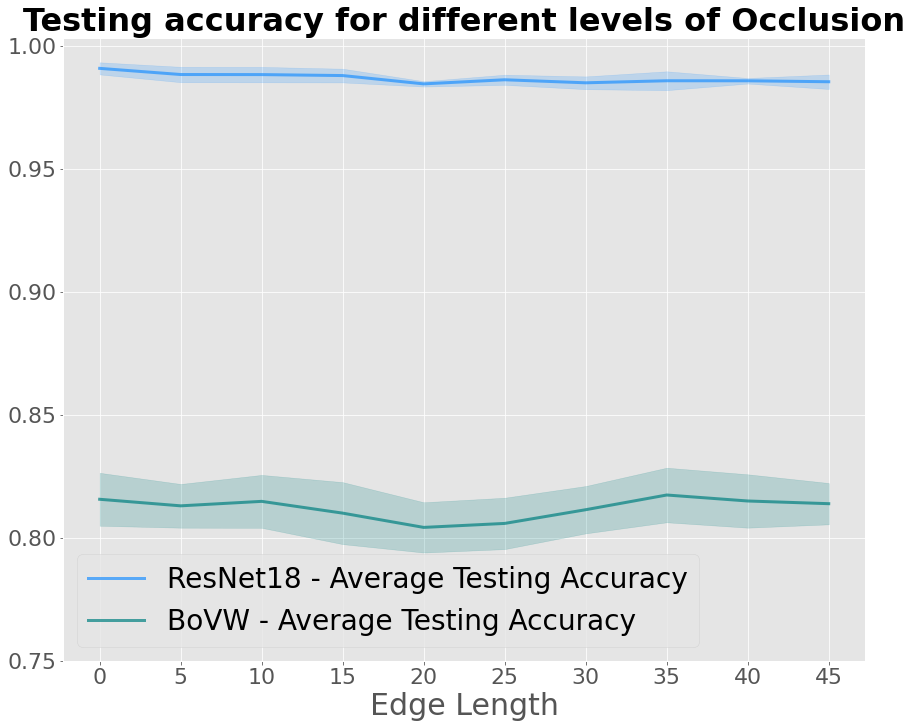

In [4]:
edges = np.arange(0, 50, 5)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Testing accuracy for different levels of Occlusion", size=32, fontweight="bold")
plt.plot(edges, res_means_5_9_acc, "-", alpha=0.7, color="dodgerblue", label="ResNet18 - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    edges,
    res_means_5_9_acc - res_stds_5_9_acc,
    res_means_5_9_acc + res_stds_5_9_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)
plt.plot(edges, bovw_means_5_9_acc, "-", alpha=0.7, color="teal", label="BoVW - Average Testing Accuracy", linewidth=3)
plt.fill_between(
    edges,
    bovw_means_5_9_acc - bovw_stds_5_9_acc,
    bovw_means_5_9_acc + bovw_stds_5_9_acc,
    alpha=0.2,
    antialiased=True,
    color="teal"
)

plt.legend(loc="best", fontsize=28)
plt.xlabel("Edge Length", fontsize=30)
#plt.ylabel("Testing accuracy", fontsize=24)
plt.xticks(edges, fontsize=22)
plt.yticks(np.arange(0.75, 1.001, 0.05), fontsize=22)
plt.tight_layout(pad=0.3)
plt.savefig('figs/test_acc_5_9.png')
plt.show()

In [12]:
means_df = pd.DataFrame(np.around([res_means_5_1_acc, bovw_means_5_1_acc,
                             res_means_5_2_acc, bovw_means_5_2_acc,
                             res_means_5_3_acc, bovw_means_5_3_acc,
                             res_means_5_4_acc, bovw_means_5_4_acc,
                             res_means_5_5_acc, bovw_means_5_5_acc,
                             res_means_5_6_acc, bovw_means_5_6_acc,
                             res_means_5_7_acc, bovw_means_5_7_acc,
                             res_means_5_8_acc, bovw_means_5_8_acc,
                             res_means_5_9_acc, bovw_means_5_9_acc], decimals=2))
print(means_df.to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &     0 &     1 &     2 &     3 &     4 &     5 &     6 &     7 &     8 &     9 \\
\midrule
0  &  0.99 &  0.97 &  0.94 &  0.90 &  0.87 &  0.83 &  0.80 &  0.77 &  0.73 &  0.70 \\
1  &  0.82 &  0.80 &  0.79 &  0.80 &  0.80 &  0.78 &  0.77 &  0.76 &  0.76 &  0.74 \\
2  &  0.99 &  0.99 &  0.99 &  0.99 &  0.99 &  0.99 &  0.98 &  0.98 &  0.98 &  0.98 \\
3  &  0.81 &  0.79 &  0.75 &  0.71 &  0.66 &  0.63 &  0.60 &  0.59 &  0.57 &  0.57 \\
4  &  0.99 &  0.97 &  0.96 &  0.95 &  0.94 &  0.93 &  0.92 &  0.91 &  0.90 &  0.90 \\
5  &  0.81 &  0.79 &  0.80 &  0.79 &  0.78 &  0.77 &  0.76 &  0.76 &  0.75 &  0.73 \\
6  &  0.99 &  0.99 &  0.99 &  0.99 &  0.99 &  0.99 &  0.98 &  0.98 &  0.97 &  0.92 \\
7  &  0.82 &  0.82 &  0.80 &  0.77 &  0.73 &  0.65 &  0.55 &  0.42 &  0.36 &  0.50 \\
8  &  0.99 &  0.97 &  0.96 &  0.95 &  0.94 &  0.93 &  0.93 &  0.91 &  0.90 &  0.88 \\
9  &  0.82 &  0.80 &  0.80 &  0.79 &  0.79 &  0.78 &  0.76 &  0.75 &  0.75 &  0.74 \\
10 &  0